In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
df=pd.read_excel("Height_Weight.xlsx")
df.head(4)
df.drop(columns=['Unnamed: 0'])
df.fillna(0)
df.drop(columns='Unnamed: 0')
del df['Unnamed: 0']
df.tail(2)

,Height,Weight
33,205.0,102.5
34,208.0,104.8


In [24]:
df.shape

(35, 2)

In [30]:
# here independent(X) variable is height and dependent(Y) variable is weight
# now split the dataset into training and testing 
h_x_train=df.Height[0:30]
h_x_test=df.Height[30:35]
#h_x_train
#h_x_test
w_y_train=df.Weight[0:30]
w_y_test=df.Weight[30:35]
print(h_x_test)
print(w_y_test)

30    198.12
31    200.66
32    203.20
33    205.00
34    208.00
Name: Height, dtype: float64
30     94.8
31     97.5
32     99.8
33    102.5
34    104.8
Name: Weight, dtype: float64


In [31]:
# now convert into Reshape because df is frames
h_x_train=np.array(df.Height[0:30]).reshape(-1,1)
h_x_test=np.array(df.Height[30:35]).reshape(-1,1)
w_y_train=np.array(df.Weight[0:30]).reshape(-1,1)
w_y_test=np.array(df.Weight[30:35]).reshape(-1,1)
print(h_x_test)
print(w_y_test)

[[198.12]
 [200.66]
 [203.2 ]
 [205.  ]
 [208.  ]]
[[ 94.8]
 [ 97.5]
 [ 99.8]
 [102.5]
 [104.8]]


In [32]:
from sklearn.linear_model import LinearRegression

In [35]:
# creating linear regression object
lreg=LinearRegression()

In [38]:
# train the model using training sets
lreg.fit(h_x_train,w_y_train)
lreg

LinearRegression()

In [43]:
# make the prediction using testing
h_y_predict=lreg.predict(h_x_test)
print('predicted',h_y_predict)
print('Actual Label',w_y_test)

predicted [[ 94.01655172]
 [ 96.42858732]
 [ 98.84062291]
 [100.54993948]
 [103.39880042]]
Actual Label [[ 94.8]
 [ 97.5]
 [ 99.8]
 [102.5]
 [104.8]]


In [45]:
# lets predicted
print(lreg.predict(np.array(208).reshape(-1,1)))
print(df.Weight[34])

[[103.39880042]]
104.8


In [50]:
# the coffecent
print("coffecent",lreg.coef_)
# intercepet
print("intercepet",lreg.intercept_)

coffecent [[0.94962031]]
intercepet [-94.12222469]


In [52]:
print(lreg.coef_[0][0])
print(lreg.intercept_[0])

0.9496203130337295
-94.12222469410457


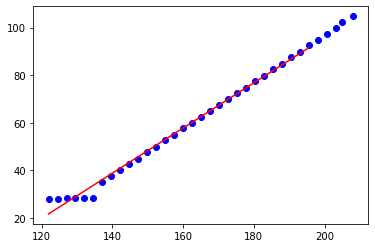

In [55]:
# ploting Regression Line Against the true label
plt.scatter(df.Height,df.Weight,color='blue')
plt.plot(h_x_train,lreg.coef_[0][0]*h_x_train+lreg.intercept_[0],'r')
plt.show()

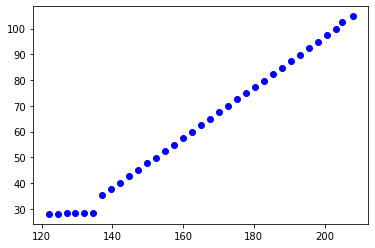

In [56]:
# original plot
plt.scatter(df.Height,df.Weight,color='blue')
#plt.plot(h_x_train,lreg.coef_[0][0]*h_x_train+lreg.intercept_[0],'r')
plt.show()

In [62]:
from sklearn.metrics  import mean_squared_error
# Evaluate Model
# # The mean squared error
print("mean squared error(test dataset)%2f"%mean_squared_error(w_y_test,h_y_predict))

mean squared error(test dataset)1.689643
